### 获得n个主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1.首先创建数据
X = np.empty((100,2))
X[:,0] = np.random.uniform(0.,100,size=100)
X[:,1] = 0.75*X[:,0]+np.random.normal(0,10.,size=100)

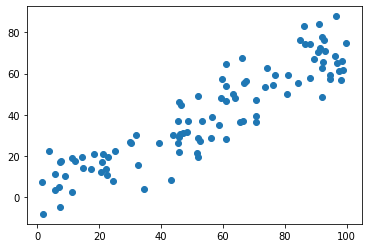

In [3]:
# 2.将数量集进行绘制
plt.scatter(X[:,0],X[:,1])

In [4]:
# 3.将数据进行 demean 处理
def demean(X):
    return X - np.mean(X,axis=0)
X_mean = demean(X)

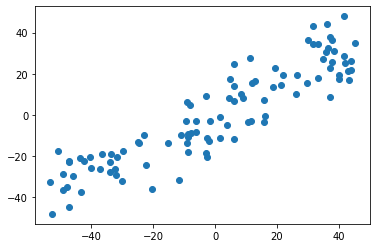

In [5]:
# 4.绘制 demean 后的图像
plt.scatter(X_mean[:,0],X_mean[:,1])

In [6]:
# 求 d
def f(w,X):
    return np.sum(X.dot(w)**2)/len(X)
#求 df
def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

# 将 w 转换为单位向量
def direction(w):
    return (1/np.linalg.norm(w)) * w
#搜索 w 的方法，即相应的第一主成分
def first_component(X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        #每一次 X与w 点乘都是乘的它的方向，即w 是一个单位方向 
        w = direction(w) 
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

In [7]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.80584499, 0.59212656])

In [8]:
# 求出 X'，即将X在 X（project） 中的那一部分去掉
X2 = np.empty(X.shape)

In [9]:
# 使用 for 循环的方法,将每个样本（向量）在
for i in range(len(X)):
    X2[i] = X[i] - X[i].dot(w)*w

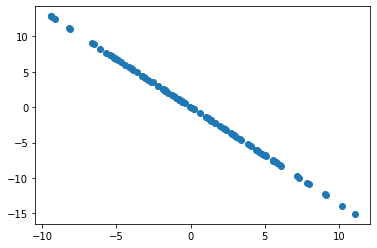

In [10]:
#可以看出来这个已经基本成了一个线性的关系，并且在去掉 第一成分的基础之上，这种线性关系与第一主成分为正交
plt.scatter(X2[:,0],X2[:,1])

In [11]:
# 将 w2 第二主成分的这个轴算出来，看这儿两个轴是否是正交关系
w2 = first_component(X2, initial_w, eta)
w2.dot(w)

5.463016891804617e-06

In [12]:
# 用向量表示 X2 的计算
X3 = np.empty(X.shape)
# 这里必须要将 Xproject reshape 一下,将这个向量变为 m*1 的向量
X3 =  X - X.dot(w).reshape(-1,1)*w 

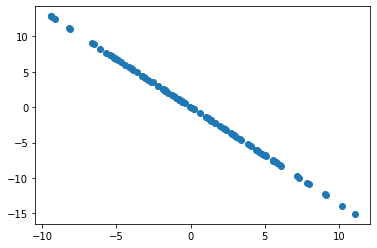

In [13]:
plt.scatter(X3[:,0],X3[:,1])

In [14]:
# 求出 X3 所在的坐标轴
w3 = first_component(X2, initial_w, eta)
w3.dot(w)

5.463016891804617e-06

### 求前 n 个主成分

In [21]:
# 一个求 n 个主成分的方法，求 n 个主成分其实就是在某一主成分的情况之下，求它的第一主成分
def first_n_components(n, X, eta=0.01, n_iters = 1e4, epsilon=1e-8):
    #将数据进行 demean
    X_pca = X.copy()
    X_pca = demean(X_pca)
    #需要一个res 矩阵存放每一次的 w 
    res = []
    #每一次都相当于求第一主成分的子过程
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        # 用向量化的方式使得 X_pca 减去第一主成分的成分，方便寻找下一主成分    
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
        
    return res

In [22]:
first_n_components(2, X)

[array([0.79775276, 0.60298469]), array([-0.60298127,  0.79775534])]